In [5]:
#importing required liberies
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [6]:
#Reading the file
file_path = '/Users/khamaleshramesh/Downloads/ML Project/CAR DETAILS FROM CAR DEKHO.csv'
data = pd.read_csv(file_path)

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


In [11]:
print(data.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


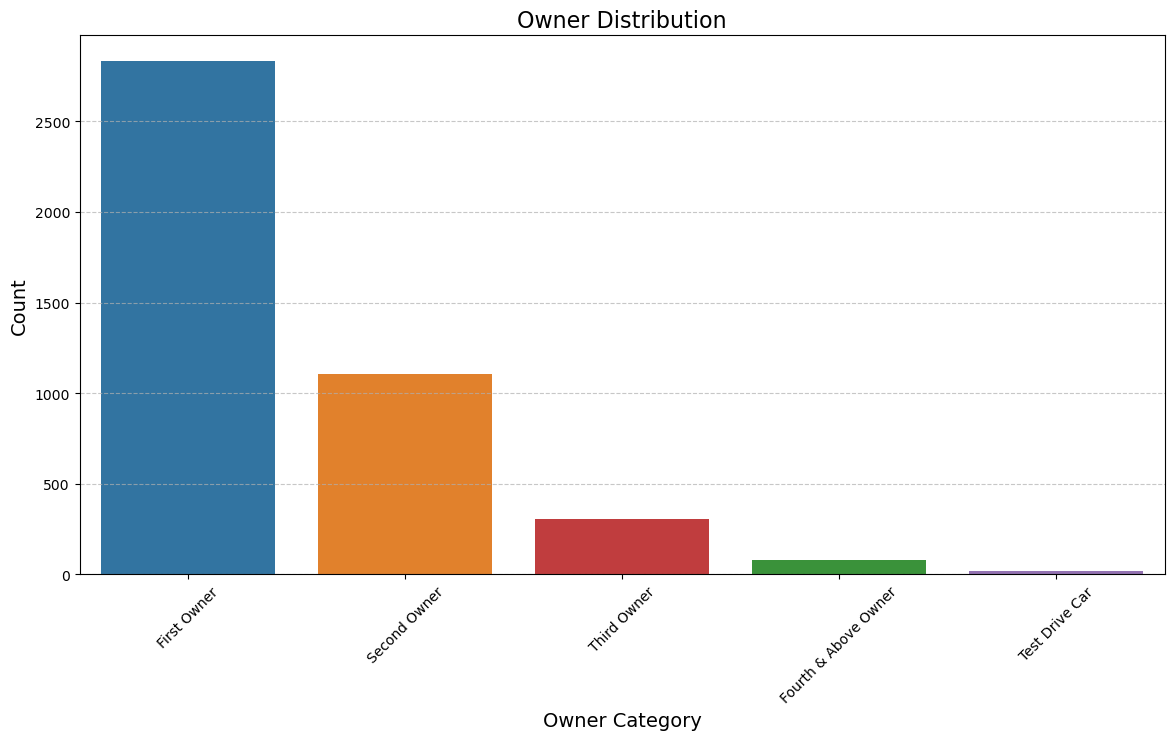

In [13]:
#plots for better understanding
plt.figure(figsize=(14, 7))
sns.countplot(x='owner', data=data, order=data['owner'].value_counts().index, hue='owner', dodge=False)
plt.title('Owner Distribution', fontsize=16)
plt.xlabel('Owner Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], [], frameon=False)  
plt.show()

In [15]:
#Removing the lest important category
data = data[~data['owner'].isin(['Fourth & Above Owner','Test Drive Car'])]

In [70]:
#Converting the category to numeric
data_encoded = data.copy()
categorical_columns = ['fuel', 'seller_type', 'transmission','owner']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data_encoded[col] = label_encoders[col].fit_transform(data_encoded[col])

In [72]:
#Test and Train split
X = data_encoded.drop(columns=['owner', 'name'])  
y = data_encoded['owner']  

In [74]:
print(X)

      year  selling_price  km_driven  fuel  seller_type  transmission
0     2007          60000      70000     4            1             1
1     2007         135000      50000     4            1             1
2     2012         600000     100000     1            1             1
3     2017         250000      46000     4            1             1
4     2014         450000     141000     1            1             1
...    ...            ...        ...   ...          ...           ...
4335  2014         409999      80000     1            1             1
4336  2014         409999      80000     1            1             1
4337  2009         110000      83000     4            1             1
4338  2016         865000      90000     1            1             1
4339  2016         225000      40000     4            1             1

[4242 rows x 6 columns]


In [76]:
print(y)

0       0
1       0
2       0
3       0
4       1
       ..
4335    1
4336    1
4337    1
4338    0
4339    0
Name: owner, Length: 4242, dtype: int64


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
#performing RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None]
}

In [88]:
#Grid search method
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [90]:
best_rf_model = grid_search.best_estimator_
print("best fit :",best_rf_model)

best fit : RandomForestClassifier(max_depth=10, random_state=42)


In [99]:
y_pred = best_rf_model.predict(X_test)

In [101]:
#Performance mertics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [103]:
print("Random Forest Model Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Random Forest Model Performance:
Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.7456
Precision: 0.7229
Recall: 0.7456
F1 Score: 0.7307


In [105]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders['owner'].classes_))


Classification Report:
              precision    recall  f1-score   support

 First Owner       0.82      0.88      0.85       582
Second Owner       0.55      0.53      0.54       221
 Third Owner       0.29      0.09      0.13        46

    accuracy                           0.75       849
   macro avg       0.55      0.50      0.51       849
weighted avg       0.72      0.75      0.73       849



## Using SMOTE

In [108]:
file_path = '/Users/khamaleshramesh/Downloads/ML Project/CAR DETAILS FROM CAR DEKHO.csv'
data = pd.read_csv(file_path)

In [110]:
#Removing the lest important catogery
data = data[~data['owner'].isin(['Fourth & Above Owner', 'Test Drive Car', 'Third Owner'])]

In [114]:
#New features added
data['car_age'] = 2024 - data['year'] 
data['price_per_km'] = data['selling_price'] / (data['km_driven'] + 1)

In [116]:
#Catogery to numeric
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

In [159]:
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

In [161]:
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,price_per_km
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,17,0.857131
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,17,2.699946
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,12,5.999940
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,7,5.434664
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,1,10,3.191467
5,Maruti Alto LX BSIII,2007,140000,125000,4,1,1,0,17,1.119991
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,4,1,1,0,8,21.999120
7,Tata Indigo Grand Petrol,2014,240000,60000,4,1,1,1,10,3.999933
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,4,1,1,0,9,33.998640
9,Maruti Celerio Green VXI,2017,365000,78000,0,1,1,0,7,4.679427


In [120]:
#Test and Train split
X = data.drop(columns=['owner', 'name', 'year'])  
y = data['owner']

In [122]:
#Scaling
scaler = StandardScaler()
numerical_columns = ['selling_price', 'km_driven', 'car_age', 'price_per_km']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
original_class_distribution = Counter(y_train)
print("Class distribution before SMOTE:", original_class_distribution)

Class distribution before SMOTE: Counter({0: 2265, 1: 885})


In [128]:
#Using SMOTE method
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [163]:
smote_class_distribution = Counter(y_train_smote)
print("Class distribution after SMOTE:", smote_class_distribution)

Class distribution after SMOTE: Counter({1: 2265, 0: 2265})


In [132]:
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [144]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

In [146]:
#Performing metrics again after SMOTE
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [165]:
print("\nRandom Forest Model Performance after SMOTE:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Random Forest Model Performance after SMOTE:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7830
Precision: 0.7976
Recall: 0.7830
F1 Score: 0.7881


In [150]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders['owner'].classes_))


Classification Report:
              precision    recall  f1-score   support

 First Owner       0.88      0.81      0.84       567
Second Owner       0.60      0.71      0.65       221

    accuracy                           0.78       788
   macro avg       0.74      0.76      0.74       788
weighted avg       0.80      0.78      0.79       788



In [152]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[461 106]
 [ 65 156]]
